In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
### Importing the required libraries

import os
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.models import Model, load_model

import matplotlib.pyplot as plt


In [ ]:
### Importing and unzipping the data from Gdrive
!unzip '/content/drive/MyDrive/NJU2K.zip' -d '/content/NJU2K'

Based on the Post training analysis we selected the JL_DCF with additional conv layers and VGG16 as backbone network 

In [2]:
JL_DCF_model=load_model('/content/drive/MyDrive/best_model_CS2_modified.h5')

Preparing the input according to the model requirement:

In [3]:
def input_prep(RGB_image,Depth_image):
  

  RGB_image =cv2.resize(RGB_image,(160,160),interpolation=cv2.INTER_AREA)   ## Loading the RGB image and resizing it to required size
        
  RGB_image=RGB_image/255

  RGB_image=np.expand_dims(RGB_image,axis=0)

  

  Depth_image =cv2.resize(Depth_image,(160,160),interpolation=cv2.INTER_AREA)  ## Loading the Depth image and resizing it to required size
       
  Depth_image=Depth_image/255

  Depth_image=np.expand_dims(Depth_image,axis=0)

  input=[RGB_image,Depth_image]
  
  return input


Predicting the salient Objects of the image:

In [4]:
def salient_predict(input):
  
  R,D,Final=JL_DCF_model.predict(input)

  Final=np.argmax(Final,axis=-1)

  Final=Final*255

  RGB_image=np.reshape(input[0],(160,160,3))

  plt.figure(figsize=(10,10))
  plt.subplot(121)
  plt.title('RGB_image')
  plt.imshow(RGB_image)   

  plt.subplot(122)
  plt.title('Predicted')
  plt.imshow(np.reshape(Final,(160,160)))
  
  return plt.show()

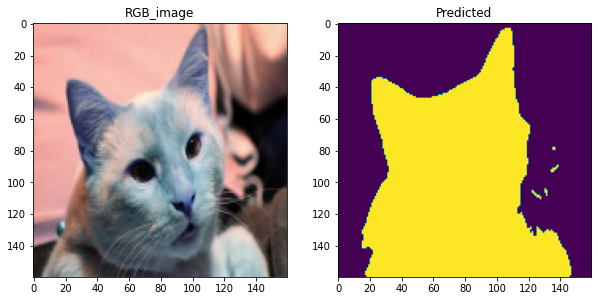

In [7]:
### Giving the inputs

RGB_image = cv2.imread('/content/NJU2K/NJU2K/RGB_left/000025_left.jpg', cv2.IMREAD_UNCHANGED)

Depth_image = cv2.imread('/content/NJU2K/NJU2K/depth/000025_left.png') 

input=input_prep(RGB_image,Depth_image)

salient_predict(input)